# 4.3
## 1.
### Imports

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

### Ler os dados

In [49]:
dados_lidos = pd.read_csv("CO_data.csv")

### Variáveis

In [50]:
# Listas de paises e anos
areas_geo = ["Europe", "France", "Germany", "Portugal", "Russia"]
anos = list(range(2000, 2022))[::2]

# Definição das condições de filtragem.
condicao_anos = dados_lidos["year"].isin(anos)

### Obter dados dos anos pretendidos para as áreas geográficas em estudo.

In [51]:
dados_areas_geo = {}

for area_geo in areas_geo:
    condicao_area_geo = dados_lidos.country == area_geo
    dados_areas_geo[area_geo] = list(dados_lidos.loc[condicao_anos & condicao_area_geo, ["co2"]]["co2"])

dados_trabalho = pd.DataFrame(dados_areas_geo)
dados_trabalho.insert(0, "year", anos)

In [52]:
# Espreitar os dados filtrados
dados_trabalho

,year,Europe,France,Germany,Portugal,Russia
0,2000,6158.767,406.829,899.352,65.686,1478.185
1,2002,6254.075,407.790,899.450,69.643,1505.520
2,2004,6431.065,413.780,886.637,67.385,1541.754
3,2006,6520.084,406.462,877.939,64.924,1618.246
4,2008,6402.666,390.778,854.508,60.107,1646.969
5,2010,6118.725,376.645,832.541,53.001,1626.188
6,2012,5994.340,356.913,813.693,49.960,1694.576
7,2014,5604.730,327.107,792.255,47.946,1631.662
8,2016,5598.924,334.440,800.340,50.442,1624.756
9,2018,5603.844,322.527,754.408,51.459,1700.453


### a)

Em **Y** temos a variável dependente, que são os valores da Europa ("Europe").
Para **X** teremos o dataset das variáveis independente.
Depois é aplicar o algoritmo OLS. 


In [53]:
X = dados_trabalho[areas_geo[1:]]
Xc = sm.add_constant(X)
Y = dados_trabalho["Europe"]
modelo = sm.OLS(Y, Xc)
resultado = modelo.fit()
parametros = resultado.params

print(parametros)

const      -1653.372466
France        12.748025
Germany       -0.583607
Portugal       1.277526
Russia         2.095967
dtype: float64


#### Sumário do resultado do ajustamento dos resultados 

In [54]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                 Europe   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     243.1
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           9.18e-07
Time:                        16:19:34   Log-Likelihood:                -54.638
No. Observations:                  11   AIC:                             119.3
Df Residuals:                       6   BIC:                             121.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1653.3725    596.997     -2.769      0.0

D:\Desenvolvimento\Repositorios\pessoais\anadi_2024\venv\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  k, _ = kurtosistest(a, axis)


#### Formula geral

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \epsilon  $$

#### Modelo

$$ Y = -1653,37 - 0,58 . X_{Germany} + 2,09 . X_{Russia} + 12,74 . X_{France} + 1,27 . X_{Portugal} + \epsilon $$


### b)

#### Cálculo dos residuos

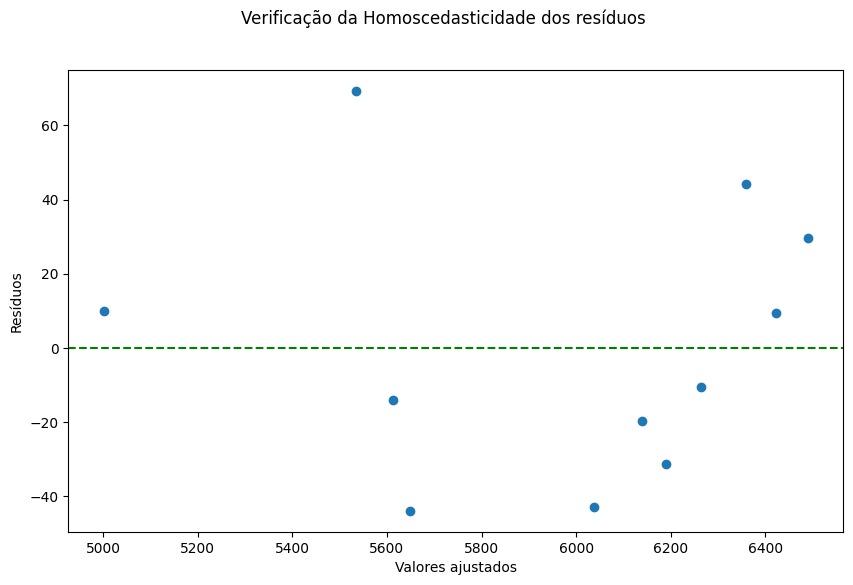

In [55]:
valores_ajustados = resultado.fittedvalues
residuos = resultado.resid

fig_residuos, axes_residuos = plt.subplots(figsize=(10, 6))
_ = fig_residuos.suptitle("Verificação da Homoscedasticidade dos resíduos")
_ = axes_residuos.axhline(y=0, color="green", linestyle="--")
_ = axes_residuos.scatter(valores_ajustados, residuos),
_ = axes_residuos.set_xlabel("Valores ajustados")
_ = axes_residuos.set_ylabel("Resíduos")

# fig_residuos.show()  # Em jupyter gera aviso.

#### Normalidade dos resíduos

In [56]:
normalidade_residuos = stats.shapiro(residuos)
print(f"pvalue: {normalidade_residuos.pvalue:.3}")

pvalue: 0.571


##### QQ-Normal-plot

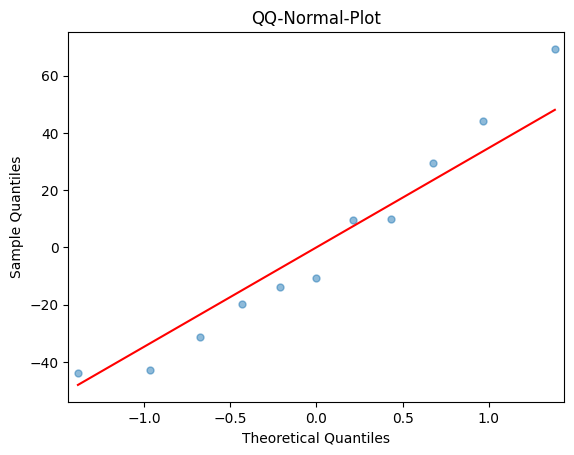

In [57]:
sm.qqplot(residuos, line='s', markersize=5, alpha=0.5)
plt.title('QQ-Normal-Plot')
plt.show()

#### Independência dos resíduos


In [58]:
durbinWatson = durbin_watson(residuos)
print('valor da estatística DW:', durbinWatson)

valor da estatística DW: 2.215613069914571


### c) Estudo da Multicolinearidade: Fator de inflação de variância - VIF

In [59]:
vif_residuos = pd.DataFrame()
vif_residuos["variaveis"] = X.columns
vif_residuos["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_residuos)

  variaveis          VIF
0    France  1654.572968
1   Germany  1576.176502
2  Portugal   414.085368
3    Russia   140.283896


#### d) Comentar
Os cálculos já foram realizados nas alíneas anteriores, vamos apenas apresentar os valores.


In [60]:
coef_adj = resultado.rsquared_adj
print(f"Coeficiente de determinação ajustado: {coef_adj:.4}")

pvalue_stat = resultado.f_pvalue
print(f"P-value da estatistica - F: {pvalue_stat:.3e}")

p_values = resultado.pvalues
print("\nP-values para os coeficientes de regressão:")
print(p_values)

Coeficiente de determinação ajustado: 0.9898
P-value da estatistica - F: 9.177e-07

P-values para os coeficientes de regressão:
const       0.032445
France      0.000233
Germany     0.442943
Portugal    0.826289
Russia      0.000488
dtype: float64


#### e)

Para realizar a previsão do valor para 2015 utilizamos a função ``predict()`` para 2015, sobre o modelo encontrado.

TODO: perceber isto

In [61]:
valores_previstos = resultado.predict(Xc)
print(f"Valores previstos: {valores_previstos}")

Valores previstos: 0     6190.168418
1     6264.710515
2     6421.609574
3     6490.576498
4     6358.359615
5     6138.377489
6     6037.287365
7     5535.392484
8     5612.869236
9     5647.765961
10    5001.049844
dtype: float64


#### Plot com reta de regressão

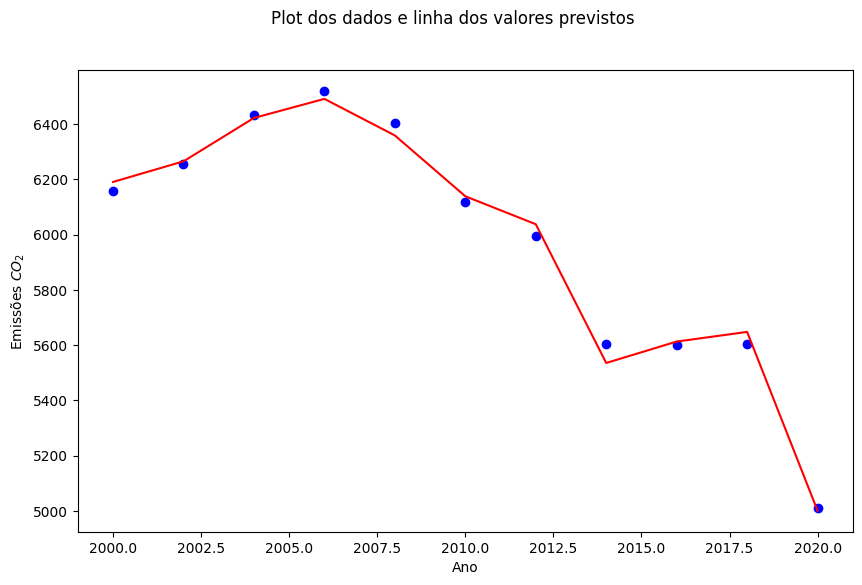

In [62]:
reg_fig, reg_axes = plt.subplots(figsize=(10, 6))
_ = reg_fig.suptitle("Plot dos dados e linha dos valores previstos")
_ = reg_axes.scatter(dados_trabalho.year, dados_trabalho.Europe, color='blue')
_ = reg_axes.plot(dados_trabalho.year, valores_previstos, color='red')
_ = reg_axes.set_xlabel("Ano")
_ = reg_axes.set_ylabel(r"Emissões $CO_2$")
# reg_fig.show()  # Em jupyter gera aviso.

#### Valor real

Valores reais lidos diretamente dos dados originais.

In [63]:
# Filtros para os dados de 2015
filtro_europa = dados_lidos.country.isin(areas_geo)
filtro_ano = dados_lidos.year == 2015

# Filtrar os dados pretendidos 
valor_real_2015 = dados_lidos.loc[filtro_europa & filtro_ano, ["country", "year", "co2"]]

# Preparar a lista de valores necessários para a previsão.
valores_x_2015 = list(valor_real_2015.co2[1:])
valores_b = list(parametros) 

print(valor_real_2015)

        country  year       co2
9387     Europe  2015  5605.937
10729    France  2015   331.580
11723   Germany  2015   795.557
24571  Portugal  2015    52.270
25181    Russia  2015  1629.713


#### Previsão do valor para 2015
A funçao *get_prediction()* tem de receber os valores das variáveis, tendo "1" no que pretendemos saber, neste caso seria o correspondente a "Europe".

In [64]:
previsto = resultado.get_prediction([1] + valores_x_2015)
previsto.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5591.926307,31.069443,5515.902119,5667.950495,5453.96254,5729.890074


Obtemos o valor de 5591.926

#### Cálculo "manual"

Se aplicarmos a formula diretamente e se fizer o cálculo manual.

In [65]:
def prever(betas, xs):
    """Aplica a formula do modelo de regressão linear múltipla.
    
    :param betas: 
    :param xs: 
    :return: 
    """
    qtde_vars_ind = len(xs)

    if len(betas) != qtde_vars_ind + 1:
        print("Coeficientes B têm de ser superiores em 1 aos valores Xs.")
        return None

    previsto = betas[0]
    calculo = f"y = {previsto}"
    for i in range(0, qtde_vars_ind):
        previsto = previsto + betas[i+1] * xs[i]
        calculo = f"{calculo} + ({betas[i+1]} x {xs[i]})"
    print(f"Cálculo realizado:\n{calculo}\n")
    return previsto

previsao_2015 = prever(valores_b, valores_x_2015)
print(f"De acordo com o modelo o valor das emissões de CO2 seria de: {previsao_2015:.3f}")


# resultado.predict(valores_2015)

Cálculo realizado:
y = -1653.3724660455464 + (12.748024611109585 x 331.58) + (-0.5836073067811742 x 795.557) + (1.277525526297552 x 52.27) + (2.0959674441775222 x 1629.713)

De acordo com o modelo o valor das emissões de CO2 seria de: 5591.926


Como podemos ver obtemos o mesmo resultado.
Claramente existem vantagens em utilizar as funções das bibliotecas, pois com menos trabalho, nos dão mais informação.